### Following marine heatwaves using [ocetrac](https://github.com/ocetrac/ocetrac/tree/main) [(Scannell et al. 2021)](https://zenodo.org/records/5102928)

This loads libraries, and reads data for applying the .track() function. Refer to the script 'saving_multiple_blobs.py' to read in and save out ocetrac-identified-blobs as nc files.

### Load libraries

In [7]:
import xarray as xr
import numpy as np
import pandas as pd
import dask.array as da
import ocetrac
import dask

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


import warnings
warnings.filterwarnings('ignore')

import cmocean

from xmovie import Movie
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### Set path to load in data

In [ ]:
dir_path = "/pub/hfdrake/datasets/CM4_MHW_blobs/"
ds = xr.open_dataset(f"{dir_path}/data/ocean_daily_cmip.01860101-01901231.tos.nc", chunks={'time':100})

In [ ]:
mt_path = "/pub/mariant3/VeryWarmWaterMasses/blob_out"

In [17]:
static = xr.open_dataset(f"{dir_path}/data/ocean_daily_cmip.static.nc")

In [18]:
ds_static = xr.merge([static,ds])

In [41]:
d = ds['tos'].isel(time = start).time.dt

In [ ]:
start = 111 #day to start running ocetrac
end = 341 #day to stop running ocetrac
print('defined start & end')

In [ ]:
binary_out = ds['tos'].sel(xh = slice(-138, 0), yh = slice(8, 49)).isel(time = slice(start,end)) > 29 #only runs ocetrac for MANSO (region)
#binary_out = ds['tos'].isel(time = slice(start,end)) > 29 #use if you want to run ocetrac without slicing lat and lon
mask = xr.ones_like(binary_out.isel(time=0))
print('binary_out & mask')
mask.plot()

In [ ]:
Tracker = ocetrac.Tracker(binary_out, mask, radius=2, min_size_quartile=0.75, timedim='time', xdim='xh', ydim='yh', positive=True)
print('Tracker')
blobs = Tracker.track()
print('blobs')
blobs.isel(time=0).plot()

_radius_ is parameter in alrgorithm

#### Visualize blobs

In [ ]:
#ds['tos'].mean(['xh','yh']).plot()

In [48]:
for i in range(1, 4):
    blob = blobs == i
    plt.figure()
    #blob.isel(time=5).plot()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [49]:
len(blob)

20

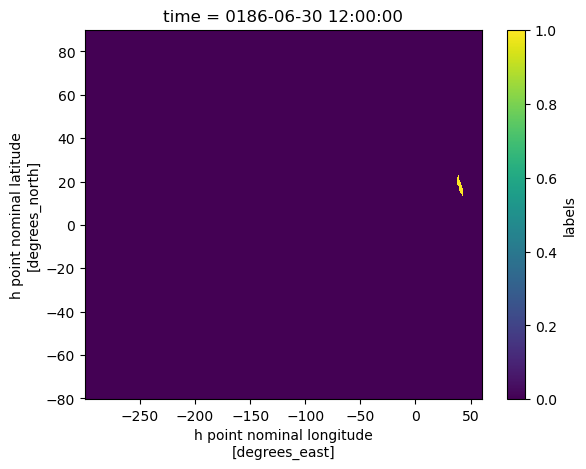

In [21]:
(blobs == 4).isel(time=0).plot()

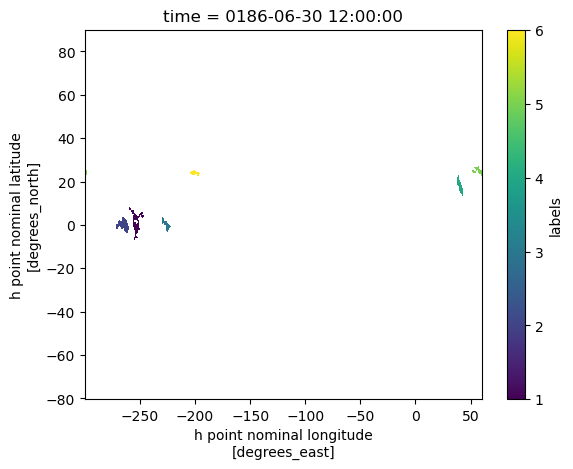

In [22]:
blobs.isel(time=0).plot()

<Figure size 1000x500 with 0 Axes>

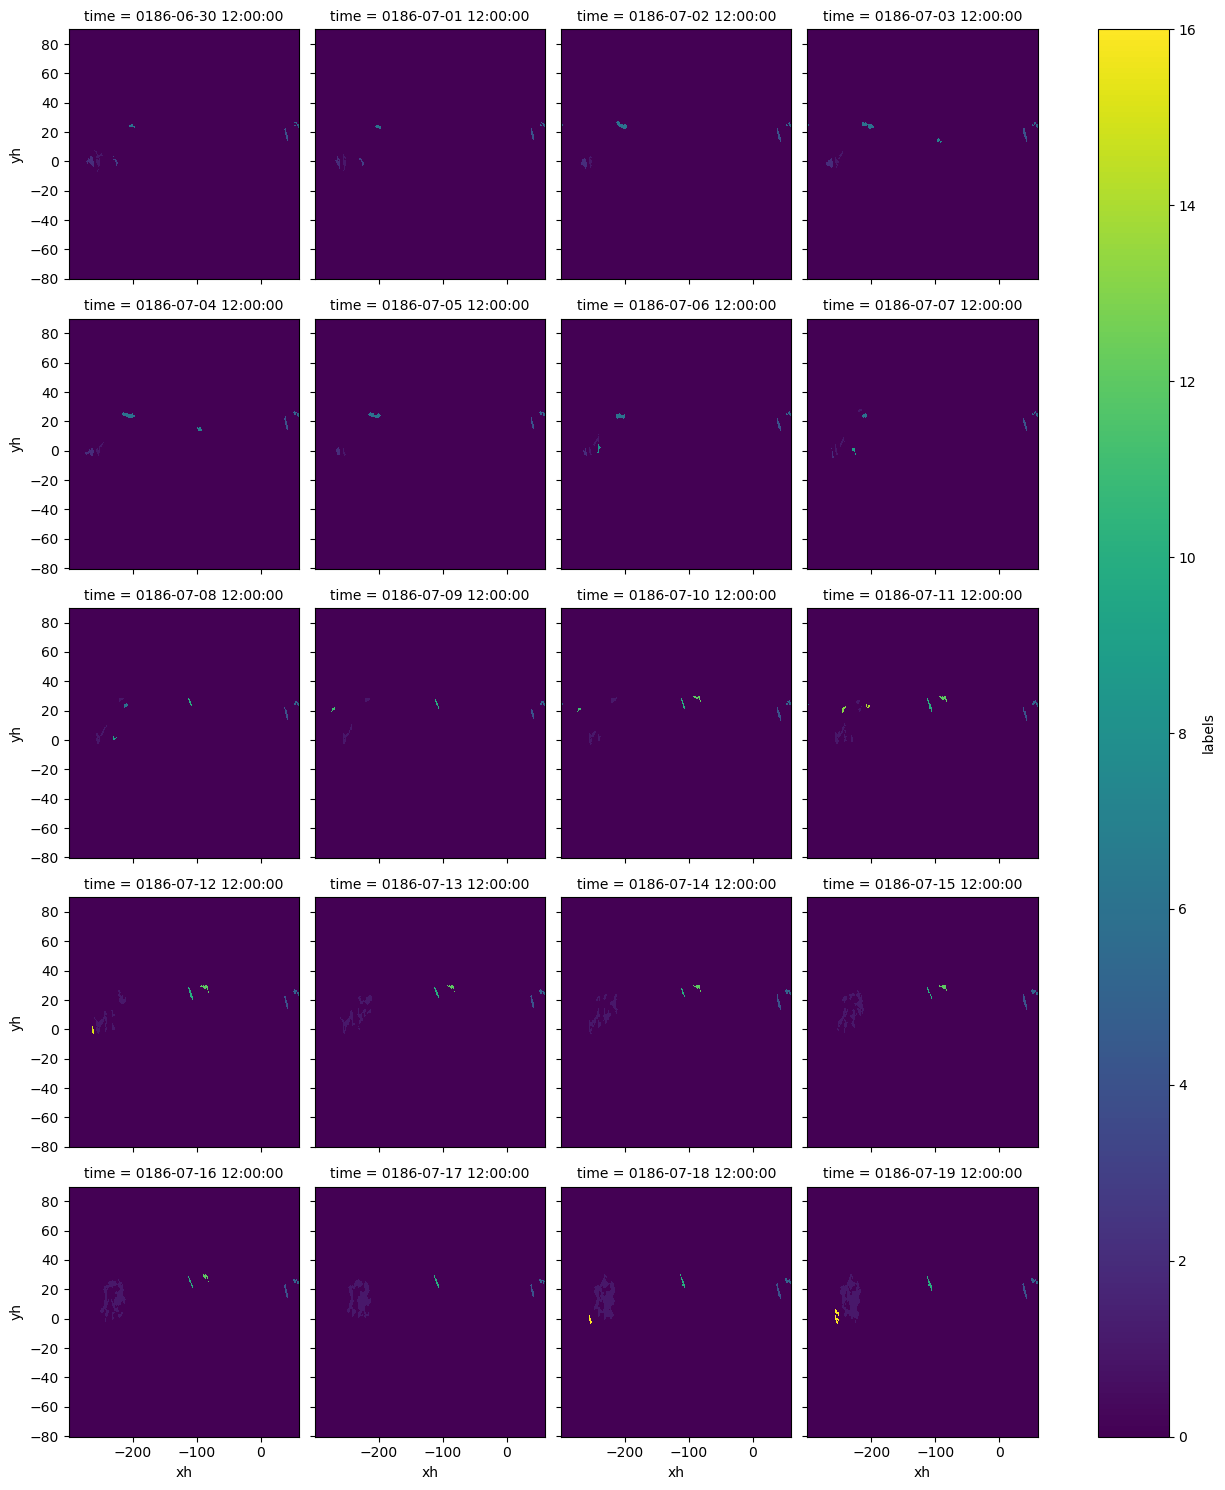

In [26]:
plt.figure(figsize=(10, 5))
blobs.where(~np.isnan(blobs), 0).isel(time=slice(0,20)).plot(col="time",col_wrap=4)

In [ ]:
from matplotlib.colors import ListedColormap
maxl = int(np.nanmax(blobs.values))
cm = ListedColormap(np.random.random(size=(maxl, 3)).tolist())

plt.figure(figsize=(16,3))
ax1 = plt.subplot(121);blobs.isel(time=0).plot(cmap= cm) #'Dark2') cm)
mask.where(mask==0).plot.contourf(colors='k', add_colorbar=False); ax1.set_aspect('equal')
ax2 = plt.subplot(122); binary_out.isel(time=0).plot(cmap='Reds', vmin=0, vmax=2);
mask.where(mask==0).plot.contourf(colors='k', add_colorbar=False); ax2.set_aspect('equal');

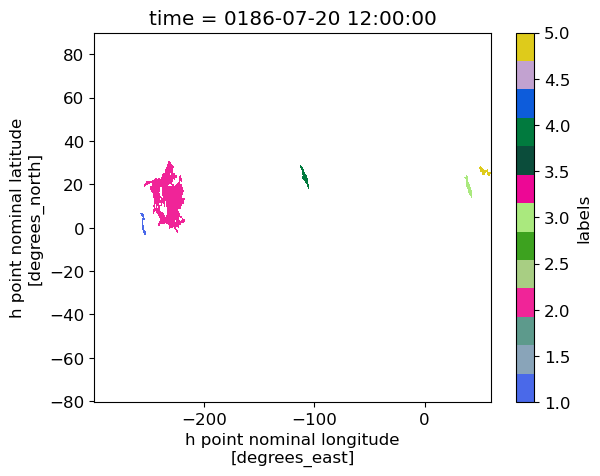

In [56]:
blobs.isel(time=0).plot(cmap= cm)

#### Initial statistical analysis (for full analysis refer to 'stats_mhws.ipynb')

In [123]:
area_list = []
max_intensity_list = []

for i in range(len(blobs)):
    current_event_i = blobs[i]
    event_mask_curr = current_event_i == current_event_i
    event_area = (ds_static.areacello).where(event_mask_curr).sum(['xh','yh'])
    #print(event_area.values.item(0))
    area_list += [event_area.values.item(0)]
    #max_intensity_list +=
    temp_mask_curr = (ds_static.tos).where(event_mask_curr).mean(['xh','yh'])
    print(np.max(temp_mask_curr.values))
    max_intensity_list += [np.max(temp_mask_curr.values)] #add -29 to get the actual max intensity

29.983774
29.97497
29.924479
29.940271
29.965517
30.019642
30.045424
30.017654
30.015507
30.03269
29.97678
30.09705
30.207228
30.152447
30.0631
30.115623
30.150204
30.000286
30.031557
30.048735


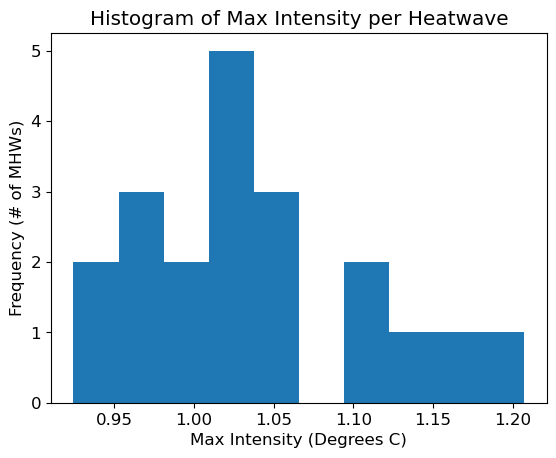

In [128]:
plt.hist([item - 29 for item in max_intensity_list])
plt.title('Histogram of Max Intensity per Heatwave')
plt.xlabel("Max Intensity (Degrees C)")
plt.ylabel("Frequency (# of MHWs)");

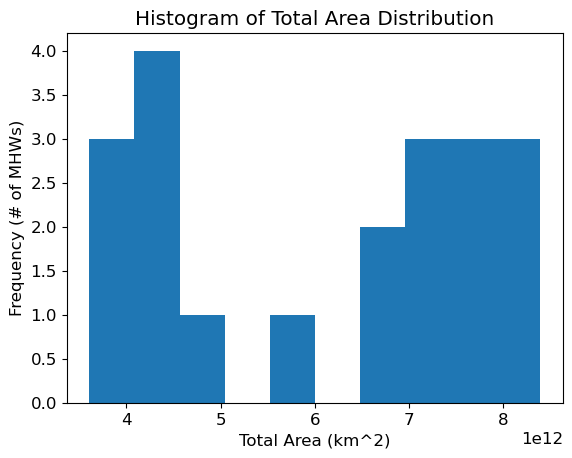

In [102]:
plt.hist(area_list)
plt.title('Histogram of Total Area Distribution')
plt.xlabel("Total Area (km^2)")
plt.ylabel("Frequency (# of MHWs)");

In [57]:
id = 4
event = blobs.where(blobs==id, drop=True)
event.shape

(7, 59, 37)

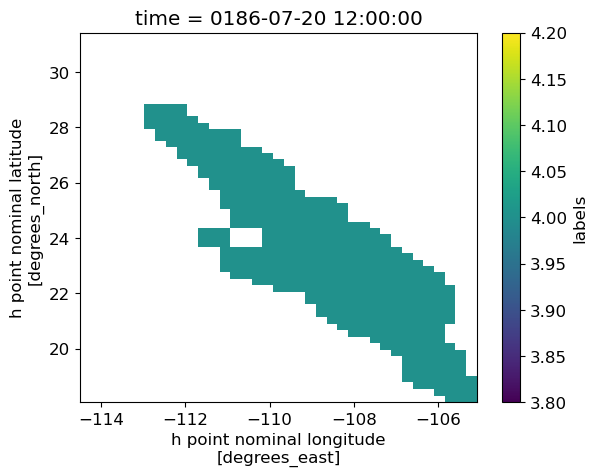

In [58]:
event.isel(time=0).plot()

In [39]:
event.time

<xarray.DataArray 'time' (time: 20)>
array([cftime.DatetimeNoLeap(186, 7, 20, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 7, 21, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 7, 22, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 7, 23, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 7, 24, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 7, 25, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 7, 26, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 7, 27, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 7, 28, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 7, 29, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 7, 30, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 7, 31, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 1, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 2, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 3, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 4, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 5, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 6, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 7, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 8, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 0186-07-20 12:00:00 ... 0186-08-08 12:00:00
Attributes:
    long_name:      time
    axis:           T
    calendar_type:  NOLEAP
    bounds:         time_bnds
    cell_methods:   time: mean

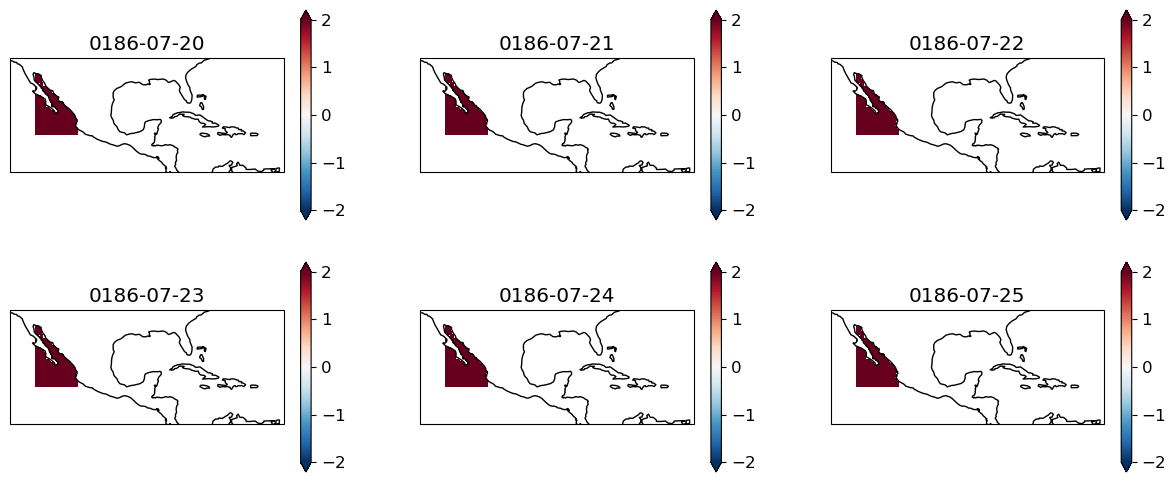

In [59]:
event_intensity = ds['tos'].where((ds.time==event.time) & 
                                             (ds.yh==event.yh) & 
                                             (ds.xh==event.xh), 
                                             drop=True).load();
event_intensity = event_intensity.expand_dims(dim='intensity', axis=3)
events_contour = event.fillna(0)

plt.rc('font', size=12); plt.figure(figsize=(15,6));
for i in enumerate(range(1,len(event.time))):
    ax = plt.subplot(2,3,i[1],projection=ccrs.PlateCarree())
    event_intensity.isel(time=i[0], intensity=0).plot(transform=ccrs.PlateCarree(), vmin=-2, vmax=2,  
                                                      cmap='RdBu_r', extend='both', add_colorbar=True, add_labels=False)
    plt.title(event.isel(time=i[0]).time.values.astype('datetime64[D]'))
    
    ax.coastlines(resolution='110m', color='black', linewidth=1) 
    ax.add_feature(cfeature.LAND, facecolor='w');
    events_contour.isel(time=i[0]).plot.contour(levels=[34,35], transform=ccrs.PlateCarree(), colors='b', linewidths=4, add_colorbar=False, add_labels=False)
    plt.ylim(10, 35)
    plt.xlim(-120, -60)

In [60]:
mo = Tracker._morphological_operations()

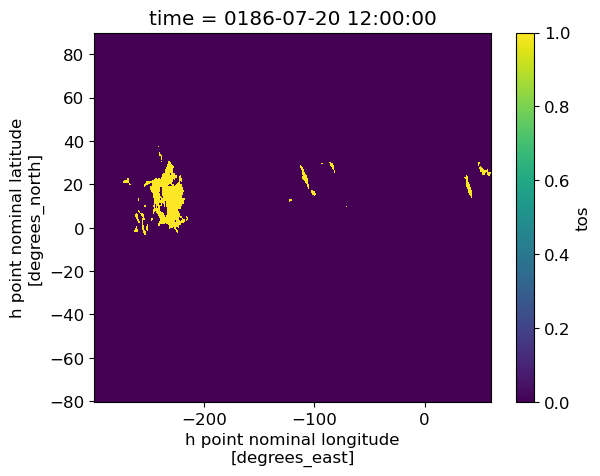

In [61]:
mo.isel(time=0).plot()

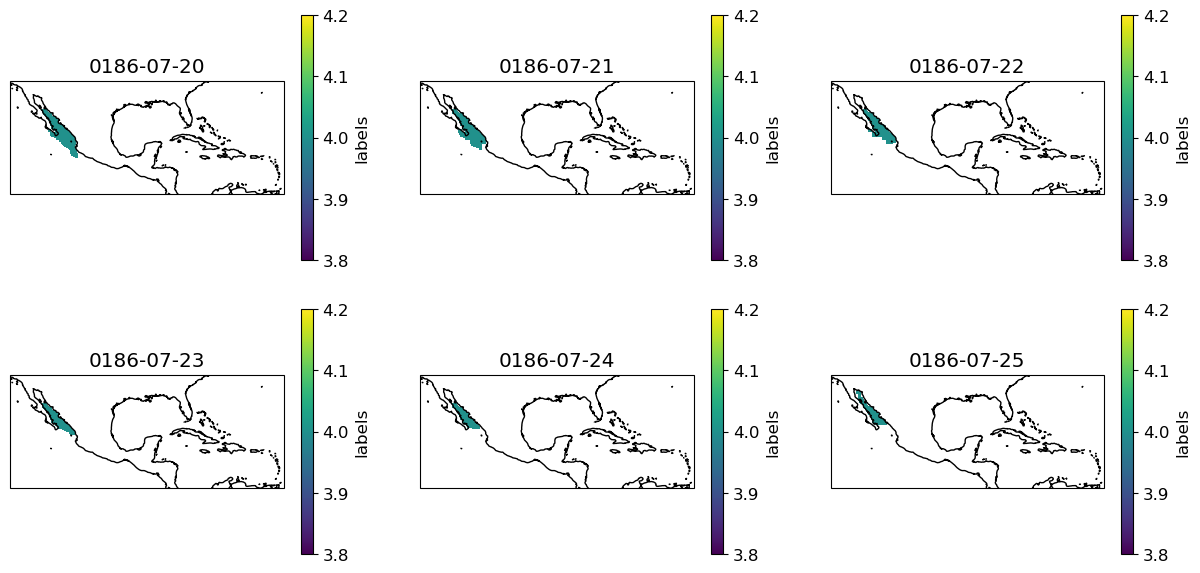

In [66]:
plt.figure(figsize=(15, 7))
for i in enumerate(range(1,len(event.time))):
    ax = plt.subplot(2,3,i[1],projection=ccrs.PlateCarree())
    ax.set_global()
    ax.coastlines()
    event.isel(time=i[0]).plot()
    plt.title(event.isel(time=i[0]).time.values.astype('datetime64[D]'))
    plt.ylim(10, 35)
    plt.xlim(-120, -60)

In [72]:
event_mask = event == event

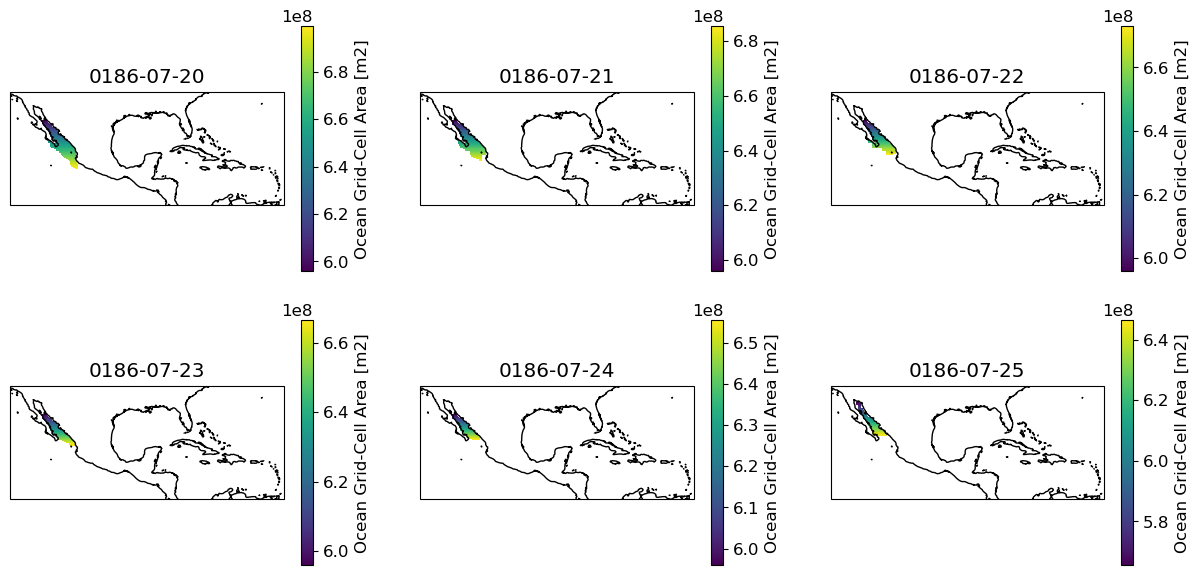

In [73]:
plt.figure(figsize=(15, 7))
for i in enumerate(range(1,len(event.time))):
    ax = plt.subplot(2,3,i[1],projection=ccrs.PlateCarree())
    ax.set_global()
    ax.coastlines()
    (ds_static.areacello).where(event_mask.isel(time = i[0])).plot()
    plt.title(event.isel(time=i[0]).time.values.astype('datetime64[D]'))
    plt.ylim(10, 35)
    plt.xlim(-120, -60)

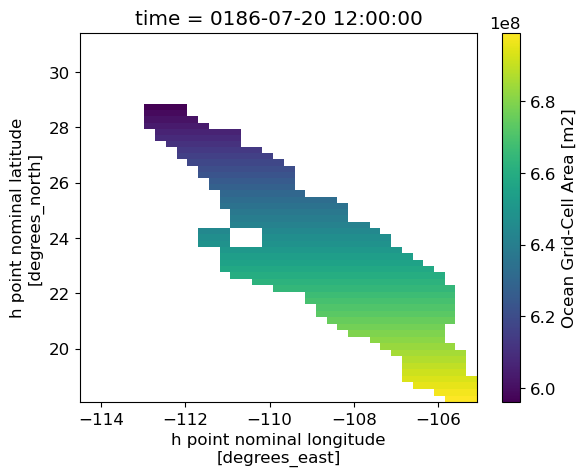

In [74]:
(ds_static.areacello).where(event_mask.isel(time = 0)).plot()

In [200]:
AB_area = (ds_static.areacello).where(AB_mask).sum(['xh','yh'])

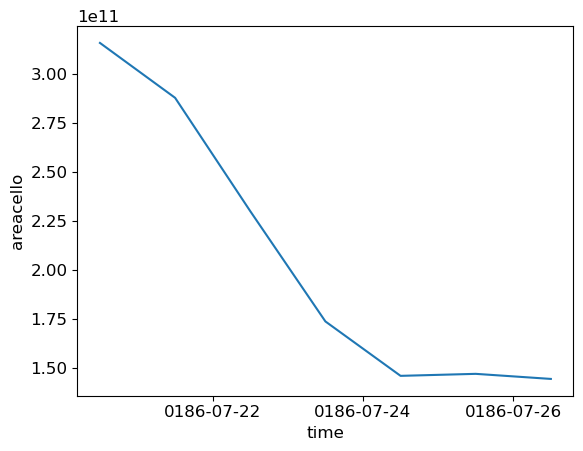

In [201]:
AB_area.plot()

In [218]:
AB_temp_mean= (ds_static.tos).where(AB_mask).mean(['xh','yh'])

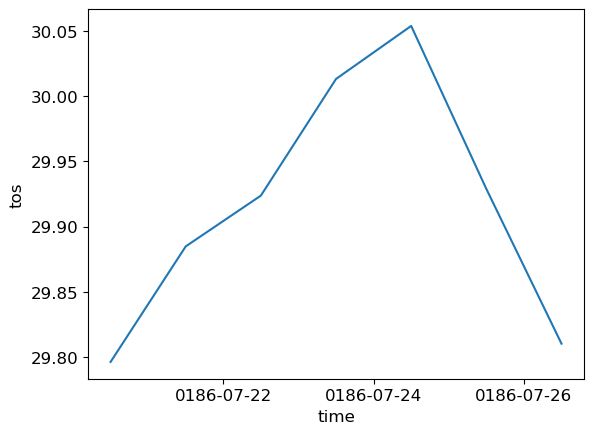

In [222]:
AB_temp_mean.plot()

In [216]:
AB_temp = (ds_static.tos).where(AB_mask).max(['time'])

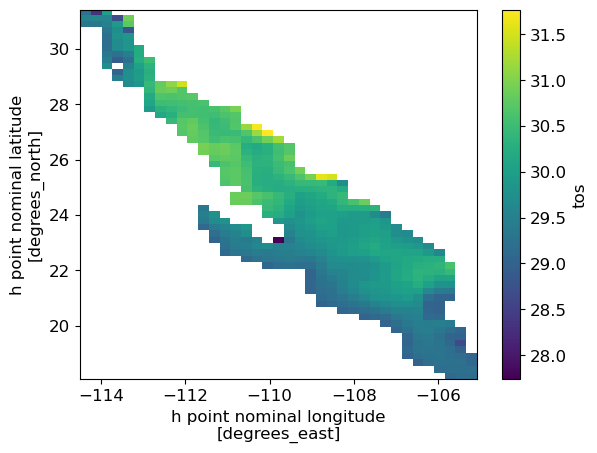

In [217]:
AB_temp.plot()

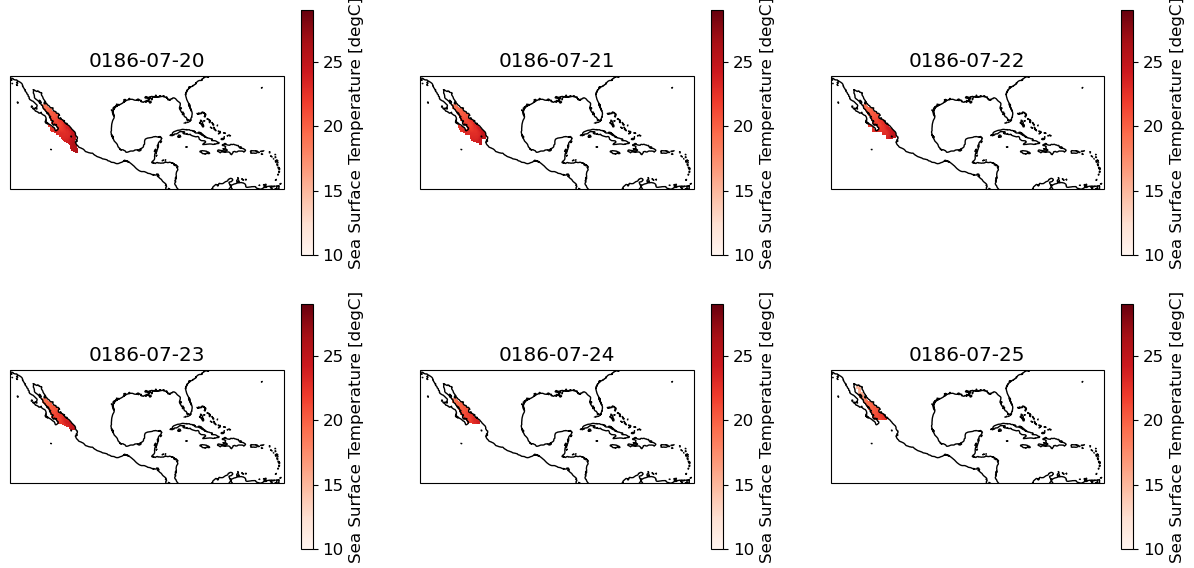

In [186]:
plt.figure(figsize=(15, 7))
for i in enumerate(range(1,len(event.time))):
    ax = plt.subplot(2,3,i[1],projection=ccrs.PlateCarree())
    ax.set_global()
    ax.coastlines()
    ((ds_static.tos.isel(time = i[0])).where(AB_mask.isel(time = i[0]))).plot(vmin=10, vmax=29, cmap = 'Reds')
    plt.title(event.isel(time= i[0]).time.values.astype('datetime64[D]'))
    plt.ylim(10, 35)
    plt.xlim(-120, -60)